<a href="https://colab.research.google.com/github/NicoleLund/flight_delay_prediction/blob/model_prep_210819/data_manipulation_modeling/investigate_models/b_random_forest_all_y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# b_random_forest_all_y
----

Written in Google Colab

By Nicole Lund 

This workbook builds a random forest model for 2017 flight performance.

In [1]:
# Import Dependencies

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Data manipulation
import numpy as np
import pandas as pd
from statistics import mean
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Parameter Selection
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Model Development
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Model Metrics
from sklearn.metrics import classification_report

# Save/load files
from tensorflow.keras.models import load_model
import joblib

# # Ignore deprecation warnings
# import warnings
# warnings.simplefilter('ignore', FutureWarning)

In [2]:
# Set the seed value for the notebook, so the results are reproducible
from numpy.random import seed
seed(1)

# Read in the csv model files

In [3]:
# Read the CSV files from AWS to Pandas Dataframe
X_train = pd.read_csv("https://flight-delay-prediction.s3.us-west-1.amazonaws.com/2017_TUS_X_train.csv")
X_test = pd.read_csv("https://flight-delay-prediction.s3.us-west-1.amazonaws.com/2017_TUS_X_test.csv")
y_train = pd.read_csv("https://flight-delay-prediction.s3.us-west-1.amazonaws.com/2017_TUS_y_train.csv")
y_test = pd.read_csv("https://flight-delay-prediction.s3.us-west-1.amazonaws.com/2017_TUS_y_test.csv")

In [4]:
X_train.head(3)

,OP_CARRIER_FL_NUM,CRS_DEP_TIME,CRS_ARR_TIME,DISTANCE,DL,OO,UA,WN,AA,EV,AS,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,ATL,DEN,DFW,HOU,IAH,JFK,LAS,LAX,MDW,MSP,OAK,ORD,PDX,PHX,SAN,SEA,SFO,SJC,SLC
0,5538,1120,1647,1437,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5538,1219,1650,1437,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2068,1625,2040,1440,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y_train.head(3)

,CANCELLED,DIVERTED,DELAY
0,0,0,0
1,0,0,0
2,0,0,0


## Random Forest Classifier Method

In [17]:
# Create and score a decision tree classifier
# Create and score random forest classifier
model = RandomForestClassifier(n_estimators=1000)
model = model.fit(X_train, y_train)

In [18]:
# Sort the features by their importance
tree_feature_sort = sorted(zip(X_train.columns,model.feature_importances_),key=itemgetter(1), reverse=True)
# tree_feature_sort

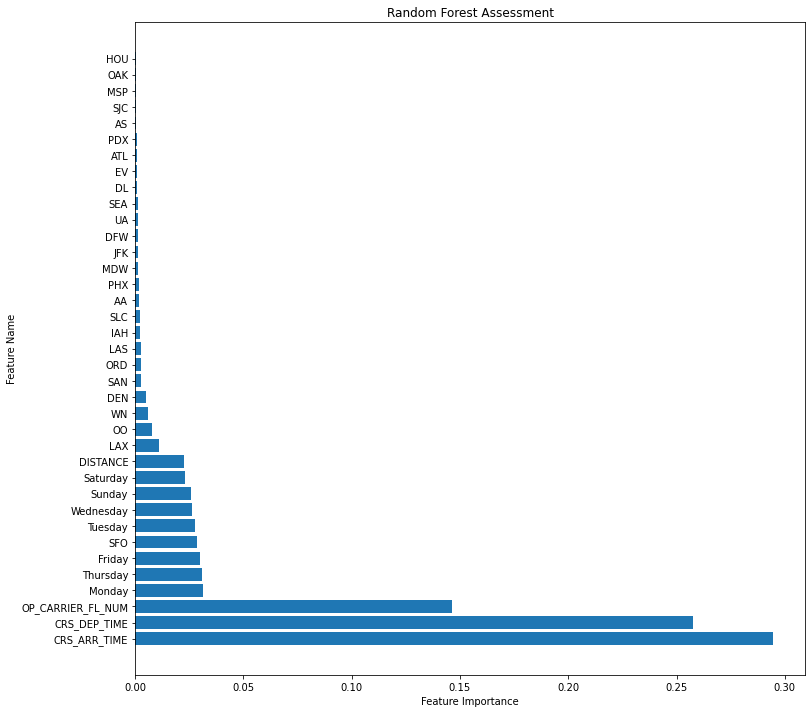

In [20]:
# Plot Decision Tree Feature Importance
fig = plt.figure(figsize=[12,12])
plt.barh(*zip(* (tree_feature_sort)))
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Random Forest Assessment')
plt.show()

# Score Model

In [22]:
print('Random Forest Score:')
model.score(X_test, y_test)

Random Forest Score:


0.8680225010817828

# Make **Predictions**

In [23]:
predictions = model.predict(X_test)
print('Truth')
print(y_test[:10])
print('Prediction')
print(predictions[:10])

Truth
   CANCELLED  DIVERTED  DELAY
0          0         0      0
1          0         0      0
2          0         0      0
3          0         0      0
4          0         0      1
5          0         0      1
6          0         0      0
7          0         0      0
8          0         0      0
9          0         0      0
Prediction
[[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]


# This model is not suitable. Visual inspection of the predictions shows that it does not perform well despite having reasonable accuracy.